# Probability Theory in Python

In [28]:
import numpy as np
import matplotlib.pyplot as plt

import random  # Used for random number generation. 

import scipy.special  # Used for factorial calculations. 
from scipy.stats import binom  # Used for distributions. 

## Ilustrate the Law of Large Numbers (LLN)  [Called "De relative frekvensernas stabilitet" in the book p.14]
1. Simulate 10000 dice throws. 
2. Plot the relative frequency of the number of times three dots occur for 1, 2, ..., 10000 throws.
3. To what number does the relative frequency converge to? What is the probability of getting three dots when throwing a dice? Do these two numbers coincide?
4. Explain what you observe. 

Make sure to create a good pedagogical plot, i.e. include title, x-label and y-label. 

**Hint: For step 1 use the random.choices() function. You should also create an empty list that you append with the relative frequencies for 1, 2, ... 10000 throws.**

In [15]:
# Help about the random.choices function
help(random.choices)

print(random.choices([1, 2, 3, 4, 5, 6,], k=3))
print(random.choices([1, 2, 3, 4, 5, 6,], k=10))

Help on method choices in module random:

choices(population, weights=None, *, cum_weights=None, k=1) method of random.Random instance
    Return a k sized list of population elements chosen with replacement.
    
    If the relative weights or cumulative weights are not specified,
    the selections are made with equal probability.

[4, 6, 3]
[5, 2, 5, 4, 3, 4, 1, 5, 3, 3]


(0.1, 0.3)

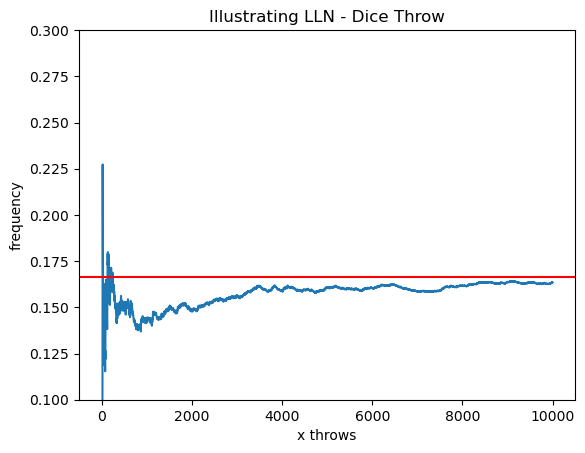

In [3]:
dice_throws = []
rel_freq = []

for i in range(1,10001):
    throws = np.array(random.choices([1, 2, 3, 4, 5, 6], k = 1))
    dice_throws.append(throws==3)

    rel_freq.append(np.mean(dice_throws))
    
fig, ax = plt.subplots()
ax.plot(rel_freq)
ax.axhline(1/6, color = 'r')
ax.set_title('Illustrating LLN - Dice Throw')
ax.set_xlabel('x throws')
ax.set_ylabel('frequency')
ax.set_ylim([0.1,0.3])

# Solve exercise 105 in the book. 

(0.3, 1.1)

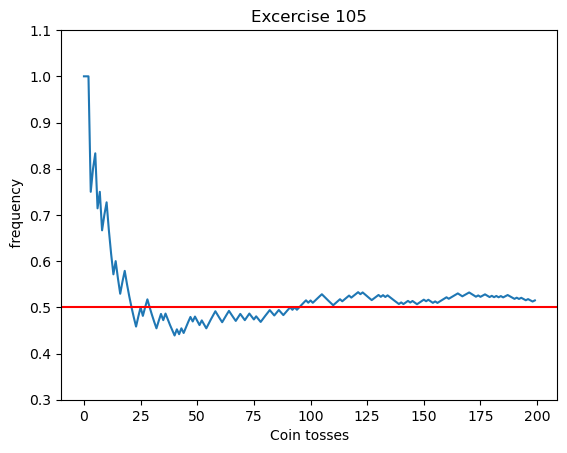

In [4]:
coin_flips = []
rel_freq_head = []

for i in range(1, 201):
    throws = np.array(random.choices([0, 1], k = 1))
    coin_flips.append(throws==1)
    
    rel_freq_head.append(np.mean(coin_flips))

ax2, ax = plt.subplots()
ax.plot(rel_freq_head)
ax.axhline(0.5, color = "r")
ax.set_title("Excercise 105")
ax.set_xlabel("Coin tosses")
ax.set_ylabel(" frequency")
ax.set_ylim(0.3, 1.1)

# Calculate 1!, 2!, ..., 12! . What is your conclusion regarding the growth of the factorial function?

In [5]:
import math

for i in range(1, 13):
    factorial_i = math.factorial(i)
    print(f"{i}! = {factorial_i}")


1! = 1
2! = 2
3! = 6
4! = 24
5! = 120
6! = 720
7! = 5040
8! = 40320
9! = 362880
10! = 3628800
11! = 39916800
12! = 479001600


In [8]:
# alternative solution
factorial_numbers = scipy.special.factorial(np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]))
print(factorial_numbers)

[1.000000e+00 2.000000e+00 6.000000e+00 2.400000e+01 1.200000e+02
 7.200000e+02 5.040000e+03 4.032000e+04 3.628800e+05 3.628800e+06
 3.991680e+07 4.790016e+08]


# We know that the binomial coefficients can be used to calculate the number of ways to choose k elements from n without replacement when the order does not matter. We have the formula: $\binom{n}{k} = \frac{n!}{k!(n-k)!}$ .

# Now calculate $\binom{6}{2}$ with a built in function and then create your own function (you can use the built in factorial function) and verify that you get the same results. 

In [9]:
print(scipy.special.comb(6,2))

15.0


In [10]:
def n_over_k(n, k):
    return scipy.special.factorial(n) / (scipy.special.factorial(k)*scipy.special.factorial(n-k))

In [11]:
n_over_k(6,2)

15.0

# Read the following documentation, note the methods such as rvs, pmf, cdf. These are available for most of the distributions meaning "once you know one of them, you know most". 

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html 

In general, for discrete distributions, the probability mass function *(also called density function)*, $p(X = x)$, calculates the probability that the random variable takes a specific value. The distribution function *(also called the cumulative distribution function)* $F(x) = P(X \leq x)$ calculates the probability that a random variable is less than or equal to a value. Random number generation simply means that you generate random numbers from a distribution. The quantile function *(also called: Percent point function or inverse CDF)* we will skip for now and will learn more about that in later chapters. 

# Solve exercise 307, 308, 309 in Python. 

In [30]:
# Question 307. 

print('307 a):', scipy.stats.binom.cdf(6, 12, 0.4))
print('307 b):', scipy.stats.binom.cdf(5, 12, 0.4))
print('307 c):', scipy.stats.binom.pmf(6, 12, 0.4))
print('307 d):', 1 - scipy.stats.binom.cdf(6, 12, 0.4))

print()

# Question 308. 
print('308 a):', scipy.stats.binom.pmf(2, 8, 0.25))
print('308 b):', scipy.stats.binom.cdf(1, 8, 0.25))
print('308 c):', 1 - scipy.stats.binom.cdf(1, 8, 0.25))

print()
# Question 309. 
print('309:', scipy.stats.binom.pmf(2, 3, 1/3))

307 a): 0.841787707392
307 b): 0.6652085575680001
307 c): 0.176579149824
307 d): 0.15821229260799996

308 a): 0.31146240234375
308 b): 0.3670806884765625
308 c): 0.6329193115234375

309: 0.22222222222222218


# Solve exercise 314 in Python. 

In [13]:
result_a = scipy.stats.poisson.cdf(4, 2)
rounded_result_a = round(result_a, 2)
print('314 a):', rounded_result_a)

result_b = scipy.stats.poisson.cdf(3, 2)
rounded_result_b = round(result_b, 2)
print('314 b):', rounded_result_b)

result_c = scipy.stats.poisson.pmf(4, 2)
rounded_result_c = round(result_c, 2)
print('314 c):', rounded_result_c)

result_d = 1 - scipy.stats.poisson.cdf(4, 2)
rounded_result_d = round(result_d, 2)
print('314 d):', rounded_result_d)


314 a): 0.95
314 b): 0.86
314 c): 0.09
314 d): 0.05


# Simulate 10000 samples from bin(n= 100, p = 0.35) and plot a histogram. Then simulate 10000 samples from bin(n= 100, p = 0.9) and plot a histogram. In the plots, what is the "middle" of the plot? Which plot has a "wider" distribution?

# What is the theoretical/true Expected Value and Variance of the two distributions? (see p.89 in the book for formulas.)

# Calculate the mean and variance of the two samples that you simulated, use the functions np.mean() and np.var(). Explain your observations . 

Mean bin(100, 0.35): 34.9635
Mean bin(100, 0.9): 89.958
Variance bin(100, 0.35): 23.258567749999997
Variance bin(100, 0.9): 9.188436000000001


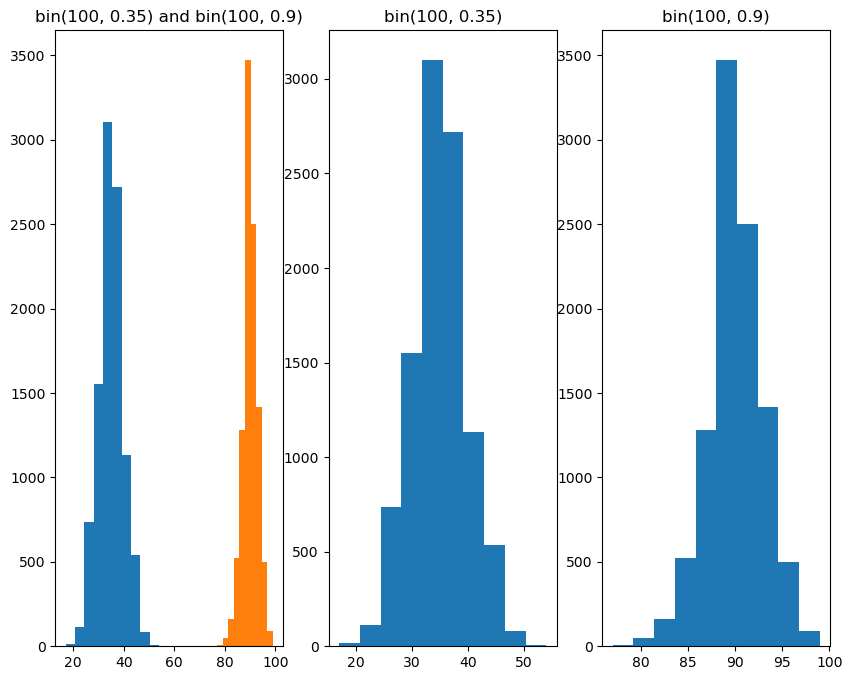

In [14]:
x = scipy.stats.binom.rvs(100, 0.35, size = 10000)
y = scipy.stats.binom.rvs(100, 0.9, size = 10000)

fig, axs = plt.subplots(1, 3, figsize=(10, 8))
axs[0].hist(x)
axs[0].hist(y)
axs[0].title.set_text('bin(100, 0.35) and bin(100, 0.9)')

axs[1].hist(x)
axs[1].title.set_text('bin(100, 0.35)')

axs[2].hist(y)
axs[2].title.set_text('bin(100, 0.9)')

# Theoretical expected values:
# bin(100, 0.35): 100*0.35 = 35. 
# bin(100, 0.9): 100*0.9 = 90.

# Theoretical Variances:
# bin(100, 0.35): 100*0.35*(1-0.35) = 22.75.
# bin(100, 0.9): 100*0.9*(1-0.9) = 9.

# Calculating mean and variances of the samples. 
print('Mean bin(100, 0.35):', np.mean(x))
print('Mean bin(100, 0.9):', np.mean(y))

print('Variance bin(100, 0.35):', np.var(x))
print('Variance bin(100, 0.9):', np.var(y))